<a href="https://colab.research.google.com/github/seb208/COVID-19-Case-Prediction-/blob/main/Covid_19_Case_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

------------------------------
Head
------------------------------
   ID   Dates  ...  CA-Total Tests  Total Positive
0   1  3/4/20  ...             515              53
1   2  3/5/20  ...             515              53
2   3  3/6/20  ...             522              60
3   4  3/7/20  ...             531              69
4   5  3/8/20  ...             550              88

[5 rows x 7 columns]
----Preparing Data-----
[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 6.00000000e+00 3.60000000e+01]
 [1.00000000e+00 9.00000000e+00 8.10000000e+01]
 [1.00000000e+00 1.20000000e+01 1.44000000e+02]
 [1.00000000e+00 1.60000000e+01 2.56000000e+02]
 [1.0

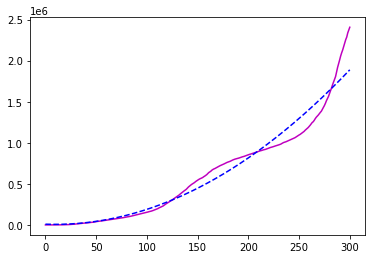

---training data for CA Total----
Accuracy:92.179%


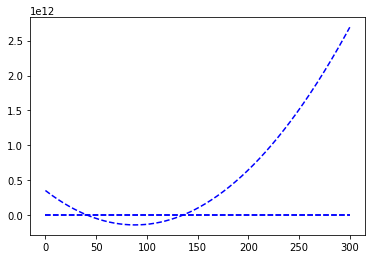

---training data for AR Total----
Accuracy:97.086%


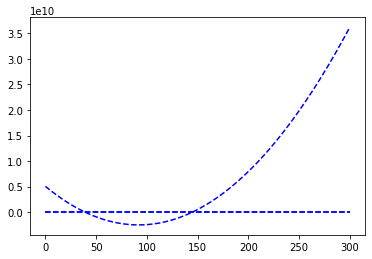

   var1(t-1)  var2(t-1)  var3(t-1)  ...   var3(t)       var4(t)   var5(t)
1        0.0   0.000000   0.000000  ...  0.000000  0.000000e+00  0.000000
2        0.0   0.000000   0.000000  ...  0.000003  2.162233e-07  0.003344
3        0.0   0.000003   0.000003  ...  0.000007  4.942249e-07  0.006689
4        0.0   0.000003   0.000007  ...  0.000016  1.081116e-06  0.010033
5        0.0   0.000003   0.000016  ...  0.000028  8.926929e-06  0.013378

[5 rows x 10 columns]
(300, 1, 9) (300,) (0, 1, 9) (0,)
Epoch 1/50
10/10 [==============================] - 0s 7ms/step - loss: 1.5690
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 1.5362
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 1.5040
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 1.4720
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 1.4405
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 1.4094
Epoch 7/50
10/10 [=======

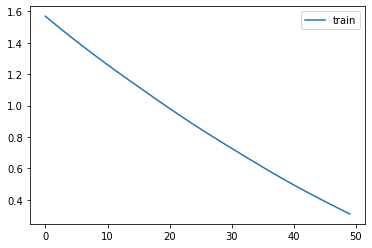

----Covid 19 Cases Prediction----
Prediction - Total Cases 1 days after 12/31/20 (Last date of dataset) is 1887985
---------
Disclamer: Dataset was taken from website The Covid Tracking Project from the CSV file all-states-history.csv
This data was filtered and refined to only include information from the states Arkansas and California
The Input Feature Vectors that were included were Dates, Location, Positve Cases, and total tests administered
The output was the Total predicted Case count after 1 day


In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters
from matplotlib.pylab import rcParams
from tensorflow.keras import layers

#Load Data
data = pd.read_csv('COVID Cases.csv',sep =',')
data[['ID','AR-Total Positve Tests','AR-Total Tests','AR-Total Tests','CA-Total Postive Tests','CA-Total Tests']]
print('-'*30);print('Head');print('-'*30)
print(data.head())
data.shape
#df = data

#data = pd.concat([pd.Series(1, index=data.index, name='00'), data], axis=1)
#data.head()

#Preparing Data
print('----Preparing Data-----')
#x = np.array(data[['ID','AR-Total Tests','CA-Total Tests']]).reshape(-1,3)
# ALL x = np.array(data[['ID','AR-Total Positve Tests','AR-Total Tests','CA-Total Postive Tests','CA-Total Tests']]).reshape(-1,5)
#x = np.array(data[['ID','AR-Total Positve Tests','AR-Total Tests','AR-Total Tests','CA-Total Postive Tests','CA-Total Tests']])
x = np.array(data['ID']).reshape(-1,1)

q = np.array(data['AR-Total Positve Tests']).reshape(-1,1)
z = np.array(data['AR-Total Tests']).reshape(-1,1)
v = np.array(data['CA-Total Postive Tests']).reshape(-1,1)
b = np.array(data['CA-Total Tests']).reshape(-1,1)
y = np.array(data['Total Positive']).reshape(-1,1)

plt.plot(y,'-m')

polyFeat = PolynomialFeatures(degree=2)
x = polyFeat.fit_transform(x)
q = polyFeat.fit_transform(q)
v = polyFeat.fit_transform(v)
print(q)

#---training-----
print('---Training data for total----')
model = linear_model.LinearRegression()
model.fit(x,y)
accuracy = model.score(x,y)
print(f'Accuracy:{round(accuracy*100,3)}%')
y0 = model.predict(x)
plt.plot(y0,'--b')
plt.show()

print('---training data for CA Total----')
model2 = linear_model.LinearRegression()
model2.fit(x,v)
accuracy1 = model2.score(x,v)
print(f'Accuracy:{round(accuracy1*100,3)}%')
v1 = model2.predict(x)
plt.plot(v1,'--b')
plt.show()

print('---training data for AR Total----')
model3 = linear_model.LinearRegression()
model3.fit(x,q)
accuracy2 = model3.score(x,q)
print(f'Accuracy:{round(accuracy2*100,3)}%')
q2 = model3.predict(x)
plt.plot(q2,'--b')
plt.show()

###Second Training ####
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

values = df.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[9,10,11,12,13,14]], axis=1, inplace=True)
values = reframed.values
print(reframed.head())

# split into train and test sets
#values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

from keras.models import Sequential
from keras.layers import InputLayer

# design network
model1 = Sequential()
#model.add(keras.layers.LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model1.add(keras.layers.Dense(1))
model1.compile(loss='mae', optimizer='adam')
# fit network
history = model1.fit(train_X, train_y, epochs=50, batch_size=32, validation_data=(test_X, test_y), verbose="auto", shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
#plt.plot(history.history['val_loss'], label='test')
plt.legend();
plt.show()

##Prediction
days= 1
print('----Covid 19 Cases Prediction----')
print(f'Prediction - Total Cases {days} days after 12/31/20 (Last date of dataset) is ',end='')
print(round(int(model.predict(polyFeat.fit_transform([[300+days]]))),2))
print('---------')
print('Disclamer: Dataset was taken from website The Covid Tracking Project from the CSV file all-states-history.csv')
print('This data was filtered and refined to only include information from the states Arkansas and California')
print('The Input Feature Vectors that were included were Dates, Location, Positve Cases, and total tests administered')
print('The output was the Total predicted Case count after 1 day')
